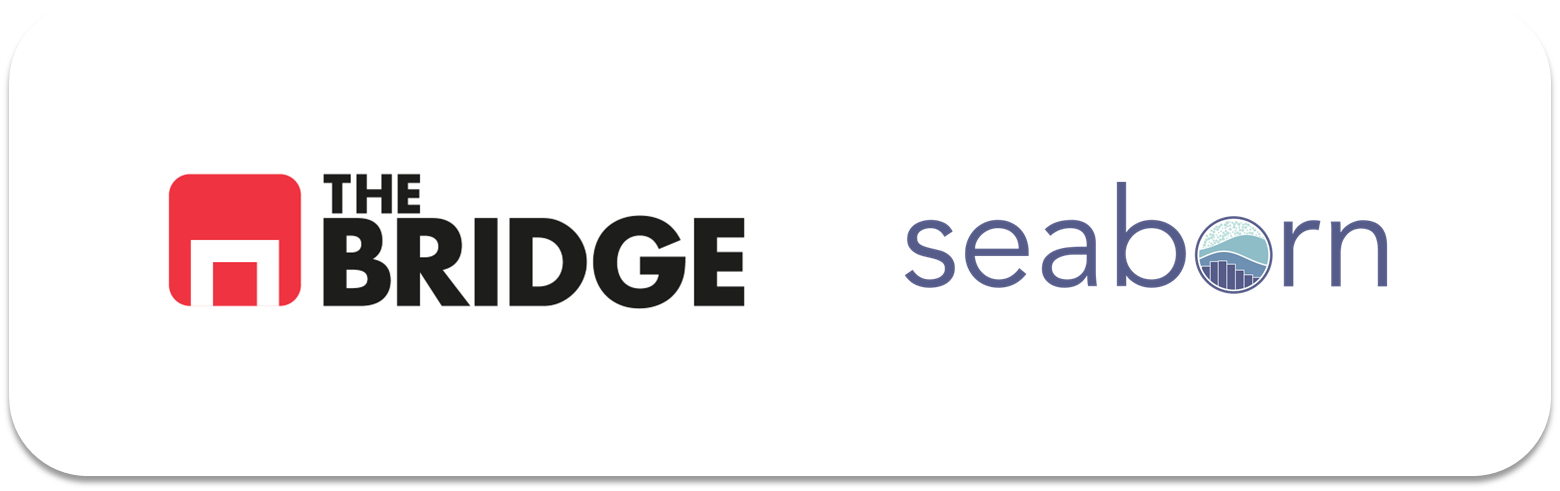

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [19]:
ruta_archivo = "./data/california_cities.csv"
df_ciudades = pd.read_csv(ruta_archivo)

print("Contenido inicial")
print(df_ciudades.head())
print("Información del DataFrame antes de la limpieza")
df_ciudades.info()

df_ciudades_limpio = df_ciudades.dropna()

print("Información del DataFrame después de eliminar nulos")
print(f"Filas originales: {len(df_ciudades)}")
print(f"Filas después de dropna: {len(df_ciudades_limpio)}")
df_ciudades_limpio.info()

Contenido inicial
   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [ ]:
def scatter_plot_plus(
    df: pd.DataFrame,
    col_num_1: str,
    col_num_2: str,
    col_cat: str = None,
    size_param: (float | str) = 50,  # Valor de tamaño o nombre de columna
    scale: float = 1/10000,         # Escala para la columna de tamaño
    show_legend: bool = True        # Controla la visibilidad de la leyenda
):
    # Pinta un diagrama de dispersión con control de color, tamaño y escala
    
    # Preparación del tamaño de los puntos 
    sizes = size_param
    
    # Si size_param es una cadena, se interpreta como el nombre de una columna
    if isinstance(size_param, str) and size_param in df.columns:
        # Multiplicar los valores de la columna por el factor de escala
        sizes = df[size_param] * scale
    
    # Preparación de los argumentos de color
    hue_args = {}
    if col_cat is not None and col_cat in df.columns:
        # Si se proporciona una columna categórica, se usa para el color
        hue_args['hue'] = df[col_cat]
        # Control de la leyenda de color
        hue_args['legend'] = show_legend
    else:
        # Si no hay columna categórica, el color no debe pasarse a la función
        # Usamos una columna de color fijo y suprimimos la leyenda si es necesario
        hue_args['hue'] = None


    # Generación del gráfico
    plt.figure(figsize=(10, 6))
    # Usamos scatterplot para manejar colores categóricos y tamaños de puntos variables de forma nativa
    ax = sns.scatterplot(
        x=df[col_num_1],
        y=df[col_num_2],
        size=sizes,              # El tamaño, fijo o variable y escalado
        sizes=(5, 500) if isinstance(size_param, str) else None, # Rango si es variable
        **hue_args,
        palette='viridis' if col_cat else None, # Paleta si hay color categórico
        alpha=0.6                # Añadir transparencia para mejor visualización
    )
    
    # Personalización adicional y leyenda de tamaño

    if isinstance(size_param, str) and show_legend:
        ax.legend(loc='best')
    elif not show_legend:
        ax.legend_.set_visible(False)
        
    
    # Títulos y etiquetas
    plt.title(f'Diagrama de Dispersión: {col_num_2} vs {col_num_1}')
    plt.xlabel(col_num_1)
    plt.ylabel(col_num_2)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.show()

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

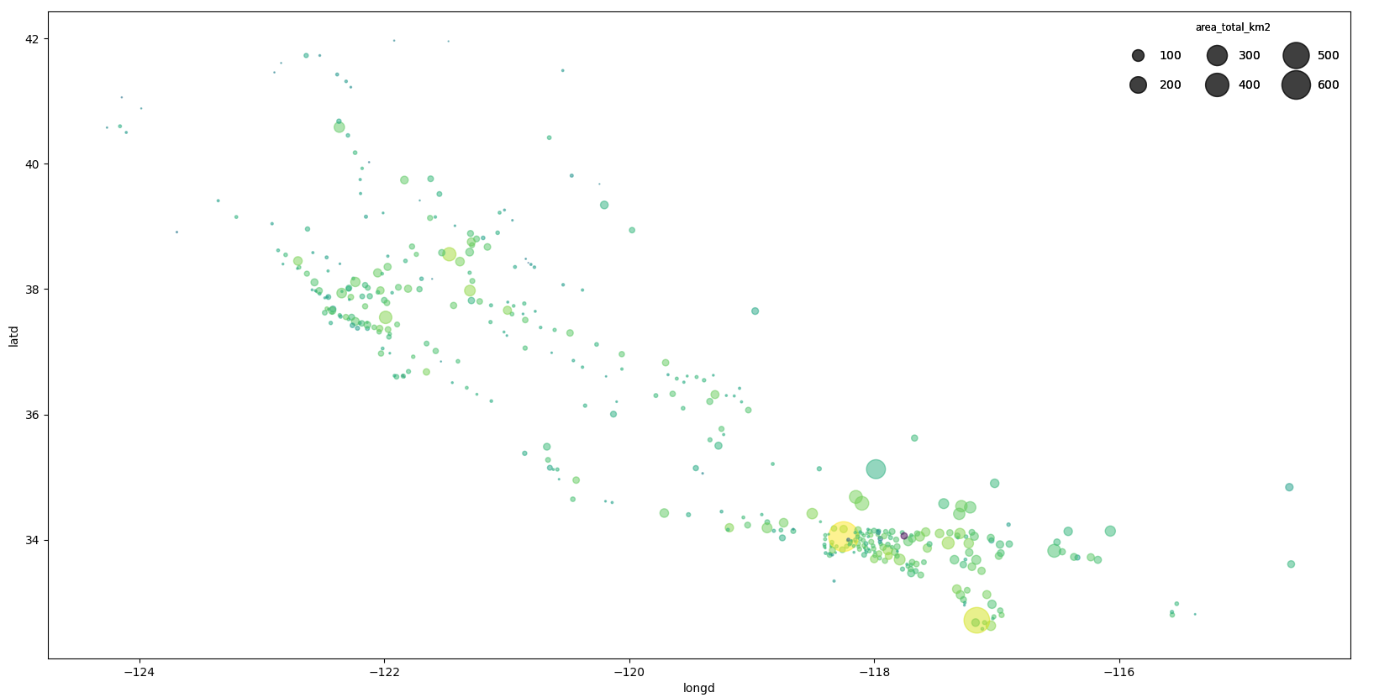

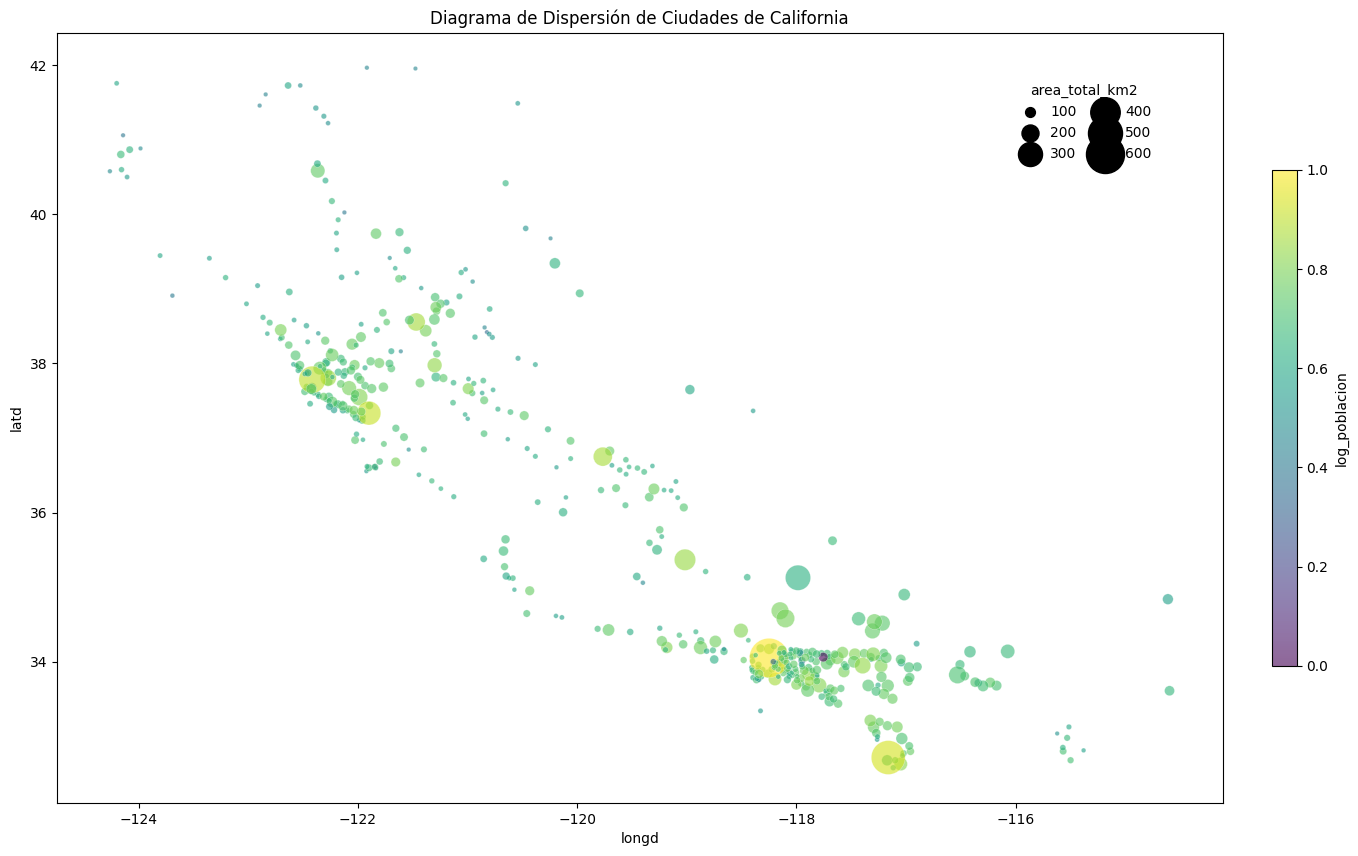

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_ciudades = pd.read_csv('data/california_cities.csv')
df_ciudades.columns = df_ciudades.columns.str.lower().str.replace(' ', '_')

# Creación de la columna log_poblacion
df_ciudades['log_poblacion'] = np.log10(df_ciudades['population_total']).fillna(0)

# Definición de las variables para el gráfico
X_COL = 'longd'  # Longitud en X
Y_COL = 'latd'   # Latitud en Y
SIZE_COLOR_COL = 'log_poblacion'

SIZE_COL_FOR_DATA = 'area_total_sq_mi' 

# Generación del Diagrama de Dispersión
plt.figure(figsize=(16, 10))

# Usamos legend=False para evitar que Seaborn cree el colorbar y la leyenda de tamaño automáticamente.
ax = sns.scatterplot(
    data=df_ciudades,
    x=X_COL,
    y=Y_COL,
    hue=SIZE_COLOR_COL,         # Color: Log Población
    size=SIZE_COL_FOR_DATA,     # Tamaño: Columna de área
    sizes=(10, 800),            
    palette='viridis',          
    alpha=0.6,                  
    legend=False                # Desactivamos TODAS las leyendas automáticas
)

# Personalización del Gráfico
plt.title('Diagrama de Dispersión de Ciudades de California')
plt.xlabel('longd')
plt.ylabel('latd')


# Creación de la Leyenda de Tamaño 
legend_labels = ['100', '200', '300', '400', '500', '600']
S_map = {
    '100': 50,  
    '200': 150, 
    '300': 300, 
    '400': 450, 
    '500': 600, 
    '600': 750  
}

legend_handles = []
for label in legend_labels:
    handle = ax.scatter(
        [], [], 
        s=S_map[label], 
        color='k',      
        alpha=1.0,      
        label=label     
    )
    legend_handles.append(handle)

# Agregamos la leyenda custom de tamaño
size_legend = ax.legend(
    handles=legend_handles,
    labels=legend_labels,
    title='area_total_km2',
    scatterpoints=1,
    frameon=False,        
    labelspacing=0.5,     
    ncol=2,               
    loc='upper right',
    bbox_to_anchor=(0.95, 0.95), 
    handletextpad=0.5,    
    columnspacing=1.0     
)


# Ajuste del Colorbar
mappable = ax.collections[0]
cbar = plt.colorbar(mappable, ax=ax, fraction=0.02, pad=0.04) 
cbar.set_label('log_poblacion')

plt.show()

## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)

In [8]:
titanic_df = pd.read_csv('data/titanic.csv')

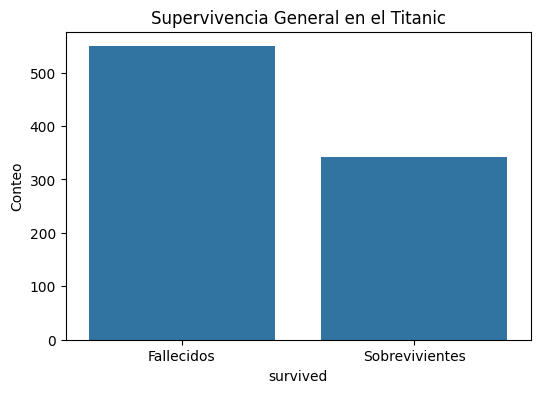

Tasa de Mortalidad: 61.62%


In [11]:
# Gráfico 1: Tasa de Mortalidad General
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=titanic_df)
plt.title('Supervivencia General en el Titanic')
plt.xticks([0, 1], ['Fallecidos', 'Sobrevivientes'])
plt.ylabel('Conteo')
plt.show()

# Cálculo de la Tasa
total_pasajeros = len(titanic_df)
fallecidos = titanic_df['survived'].value_counts()[0]
tasa_mortalidad = fallecidos / total_pasajeros
print(f"Tasa de Mortalidad: {tasa_mortalidad:.2%}")

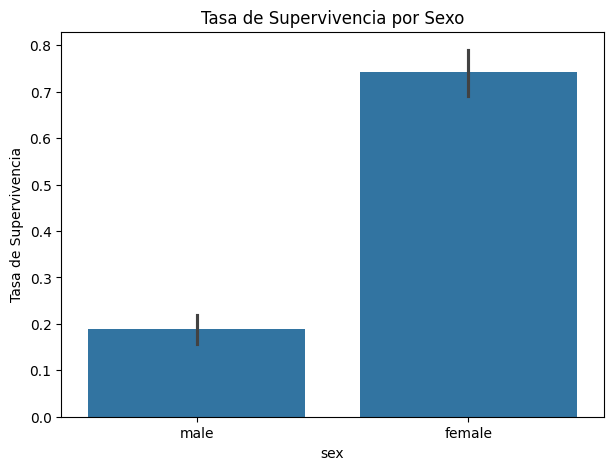

In [13]:
# Gráfico 2: Supervivencia por Sexo
plt.figure(figsize=(7, 5))
sns.barplot(x='sex', y='survived', data=titanic_df)
plt.title('Tasa de Supervivencia por Sexo')
plt.ylabel('Tasa de Supervivencia')
plt.show()

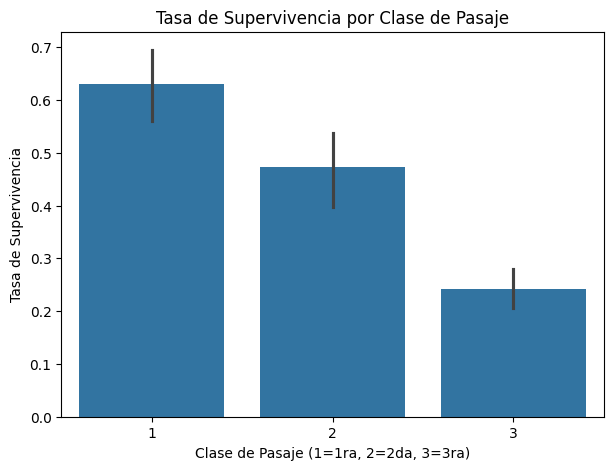

In [14]:
# Gráfico 3: Supervivencia por Clase de Pasaje
plt.figure(figsize=(7, 5))
sns.barplot(x='pclass', y='survived', data=titanic_df)
plt.title('Tasa de Supervivencia por Clase de Pasaje')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Clase de Pasaje (1=1ra, 2=2da, 3=3ra)')
plt.show()

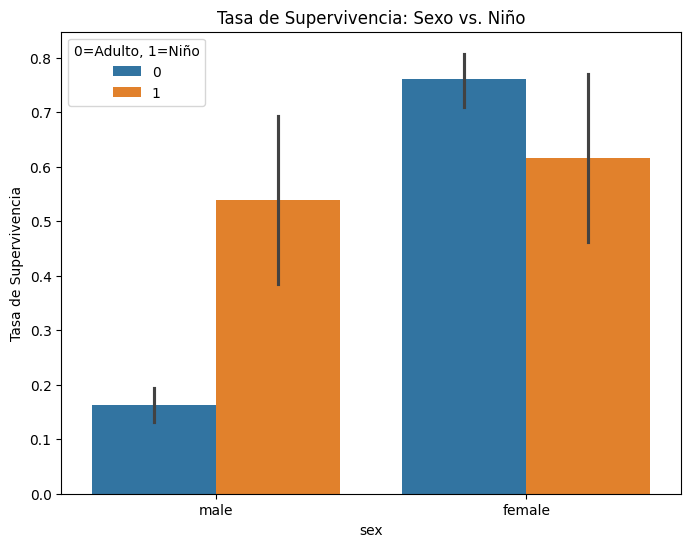

In [15]:
# Gráfico 4: Supervivencia por Edad
# Convertimos la edad a categorías (Niño: <15, Adulto: >=15) para simplificar la comparación
titanic_df['child'] = (titanic_df['age'] < 15).astype(int)

# Supervivencia agrupada por Sexo y ser Niño
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', hue='child', data=titanic_df)
plt.title('Tasa de Supervivencia: Sexo vs. Niño')
plt.ylabel('Tasa de Supervivencia')
plt.legend(title='0=Adulto, 1=Niño')
plt.show()

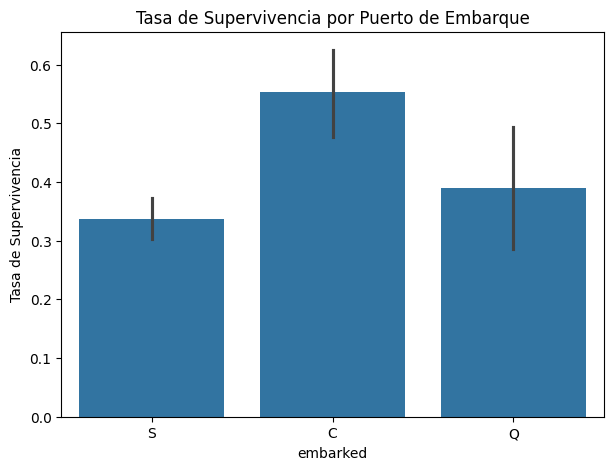

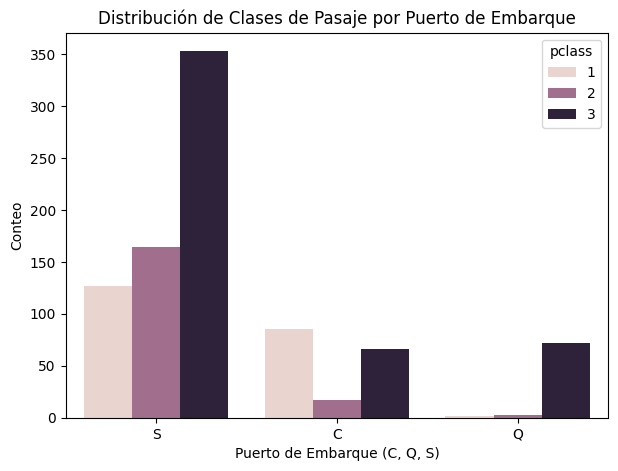

In [ ]:
# Gráfico 5.1: Supervivencia por Puerto de Embarque
plt.figure(figsize=(7, 5))
sns.barplot(x='embarked', y='survived', data=titanic_df)
plt.title('Tasa de Supervivencia por Puerto de Embarque')
plt.ylabel('Tasa de Supervivencia')
plt.show()

# Gráfico 5.2: Distribución de Clase (Pclass) por Puerto de Embarque
plt.figure(figsize=(7, 5))
sns.countplot(x='embarked', hue='pclass', data=titanic_df)
plt.title('Distribución de Clases de Pasaje por Puerto de Embarque')
plt.ylabel('Conteo')
plt.xlabel('Puerto de Embarque (C, Q, S)')
plt.show()